# Poisson Regression

In this notebook, we will build a Poisson regression model on the **student awards** dataset. The dataset contains two variables - awards won and math score.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
#fetching data
df = pd.read_csv("competition_awards_data.csv",  sep = ',', header= 0 )
df.head()

,Awards,Math Score
0,0,43
1,0,38
2,0,41
3,0,33
4,0,39


In [3]:
# number of observations: 51
df.shape

(200, 2)

In [4]:
# checking NA
# there are no missing values in the dataset
df.isnull().values.any()

False

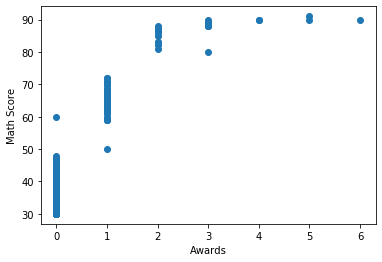

In [5]:
# plotting awards agains Math score
fig, ax = plt.subplots()
ax.set_xlabel("Awards")                                
ax.set_ylabel("Math Score")
ax.scatter(df.Awards, df['Math Score'])
plt.show()

In [6]:
size = len(df.index)
index = range(0, size, 5)

train = df[~df.index.isin(index)]
test = df[df.index.isin(index)]

In [7]:
print(len(train))
print(len(test))

160
40


In [8]:
# defining X and y for model training and test
X_train = train['Math Score'].values.reshape(-1, 1)
y_train = train.Awards

X_test = test['Math Score'].values.reshape(-1, 1)
y_test = test.Awards

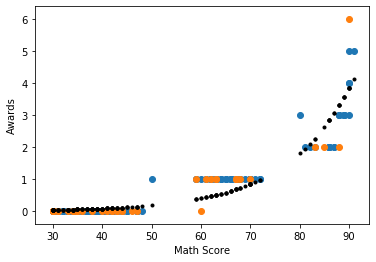

In [9]:
# Doing a polynomial regression: Comparing linear, quadratic and cubic fits
# Pipeline helps you associate two models or objects to be built sequentially with each other, 
# in this case, PoissonRegressor() is the only object

pipeline = Pipeline([('model', PoissonRegressor())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2_test = metrics.r2_score(y_test, y_pred)

# training performance
y_pred_train = pipeline.predict(X_train)
r2_train = metrics.r2_score(y_train, y_pred_train)

# plot predictions and actual values against Math score
fig, ax = plt.subplots()
ax.set_xlabel("Math Score")                                
ax.set_ylabel("Awards")

# train data in blue
ax.scatter(X_train, y_train)
ax.plot(X_train, y_pred_train, '.', color='black')

# test data
ax.scatter(X_test, y_test)
ax.plot(X_test, y_pred, '.', color='black')

plt.show()

In [10]:
# respective test r-squared scores of predictions
print(r2_train)
print(r2_test)

0.8902479195335574
0.8023593129776402


In [11]:
eval = pd.DataFrame({'y_pred': [round(y, 0) for y in y_pred], 'y': y_test}).reset_index()

In [12]:
print('Frequency table')
eval.groupby(['y', 'y_pred']).agg('count').reset_index().pivot(index='y', columns='y_pred', values='index').fillna(0)

Frequency table


y_pred,0.0,1.0,2.0,3.0,4.0
y,,,,,
0,26.0,0.0,0.0,0.0,0.0
1,3.0,7.0,0.0,0.0,0.0
2,0.0,0.0,1.0,2.0,0.0
6,0.0,0.0,0.0,0.0,1.0
